<a href="https://colab.research.google.com/github/frizzyfro/Predictive-Modeling/blob/main/Predictive_Models_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import data set
import pandas as pd
import numpy as np
from google.colab import files
import io
uploaded = files.upload()
dfFS = pd.read_csv(io.BytesIO(uploaded['inq2015.csv']))

Saving inq2015.csv to inq2015.csv


In [ ]:
import pandas as pd
dfFS=pd.read_csv('inq2015.csv')

In [ ]:
#Missing Values
missing_values = dfFS.isnull().mean() * 100
print(missing_values)

ETHNICITY              21.545222
TERRITORY               0.001093
ACADEMIC_INTEREST_1    51.593756
ACADEMIC_INTEREST_2    72.804486
Enroll                  0.000000
CONTACT_DATE            0.000000
TOTAL_CONTACTS          0.000000
SELF_INIT_CNTCTS        0.000000
TRAVEL_INIT_CNTCTS      0.000000
SOLICITED_CNTCTS        0.000000
REFERRAL_CNTCTS         0.000000
CAMPUS_VISIT            0.000000
CONTACT_CODE1           0.156315
LEVEL_YEAR              0.000000
IRSCHOOL               16.735533
satscore               70.482718
sex                     4.189895
mailq                   0.000000
telecq                 77.479723
premiere                0.000000
interest                0.000000
stucell                 0.000000
init_span               0.000000
int1rat                 0.000000
int2rat                 0.000000
hscrat                  0.000000
avg_income             22.877725
distance               21.280689
Instate                 0.000000
dtype: float64


In [ ]:
# Drop Unnecessary columns
dfFS=dfFS.drop(columns=['TOTAL_CONTACTS','ACADEMIC_INTEREST_1','ACADEMIC_INTEREST_2','IRSCHOOL','CONTACT_CODE1','CONTACT_DATE','LEVEL_YEAR','satscore','telecq'])


In [ ]:
dfFS.isna().sum()

ETHNICITY             19710
TERRITORY                 1
Enroll                    0
SELF_INIT_CNTCTS          0
TRAVEL_INIT_CNTCTS        0
SOLICITED_CNTCTS          0
REFERRAL_CNTCTS           0
CAMPUS_VISIT              0
sex                    3833
mailq                     0
premiere                  0
interest                  0
stucell                   0
init_span                 0
int1rat                   0
int2rat                   0
hscrat                    0
avg_income            20929
distance              19468
Instate                   0
dtype: int64

In [ ]:
dfFS.describe(include='all')

,ETHNICITY,TERRITORY,Enroll,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,sex,mailq,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,87649.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,0.031350,1.214119,0.364815,0.547222,0.039899,0.034673,0.631610,4.084377,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,0.174264,1.666529,0.557067,0.649426,0.226191,0.187322,0.482371,1.440329,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


In [ ]:
# Read "name.csv" file
dfFS = pd.read_csv("inq2015.csv")

In [ ]:
# Missing Values
dfFS.head()
dfFS.describe(include='all')
dfFS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ETHNICITY            71772 non-null  object 
 1   TERRITORY            91481 non-null  object 
 2   ACADEMIC_INTEREST_1  44283 non-null  object 
 3   ACADEMIC_INTEREST_2  24879 non-null  object 
 4   Enroll               91482 non-null  int64  
 5   CONTACT_DATE         91482 non-null  object 
 6   TOTAL_CONTACTS       91482 non-null  int64  
 7   SELF_INIT_CNTCTS     91482 non-null  int64  
 8   TRAVEL_INIT_CNTCTS   91482 non-null  int64  
 9   SOLICITED_CNTCTS     91482 non-null  int64  
 10  REFERRAL_CNTCTS      91482 non-null  int64  
 11  CAMPUS_VISIT         91482 non-null  int64  
 12  CONTACT_CODE1        91339 non-null  object 
 13  LEVEL_YEAR           91482 non-null  object 
 14  IRSCHOOL             76172 non-null  object 
 15  satscore             27003 non-null 

In [ ]:
# missing values imputation
NA_names =['SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS', 'CAMPUS_VISIT', 'interest', 'init_span', 'int1rat','int2rat','avg_income','distance', 'hscrat','sex','mailq','premiere','Enroll'] 
dfFS[NA_names]=dfFS[NA_names].fillna(dfFS[NA_names].mean())
dfFS['sex']=dfFS['sex'].fillna(1)
dfFS['avg_income']=dfFS['avg_income'].fillna(47315.334146)
dfFS['distance']=dfFS['distance'].fillna(380.427645)
dfFS['ETHNICITY']=dfFS['ETHNICITY'].fillna('C')
dfFS.describe(include='all')

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,91482,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482
unique,7,11,211,208,NaN,1113,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30JUN13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,51460,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,18098.549708,353.101833,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,34780.000000,146.790013,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,47315.334146,329.522736,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,52028.000000,380.427645,NaN


In [ ]:
# Generate dummy variables
dummy_data =pd.get_dummies(dfFS[['ETHNICITY','TERRITORY','Instate']])

In [ ]:
dummy_data.describe()

,ETHNICITY_A,ETHNICITY_B,ETHNICITY_C,ETHNICITY_H,ETHNICITY_I,ETHNICITY_N,ETHNICITY_O,TERRITORY_000,TERRITORY_1,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_N,Instate_Y
count,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000
mean,0.036466,0.092663,0.562515,0.109191,0.007892,0.161704,0.029569,0.000055,0.100774,0.159824,0.101233,0.115990,0.153396,0.098784,0.128943,0.072626,0.035898,0.032465,0.379550,0.620450
std,0.187448,0.289961,0.496079,0.311880,0.088488,0.368181,0.169395,0.007393,0.301031,0.366445,0.301639,0.320215,0.360371,0.298374,0.335139,0.259524,0.186036,0.177234,0.485278,0.485278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Variable Transformation
import numpy as np

In [ ]:
# Construct X & dropped mailq
num_names=['SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS', 'CAMPUS_VISIT', 'interest', 'init_span', 'int1rat','int2rat','avg_income','distance', 'hscrat','sex','premiere','Enroll']
dum_names=['ETHNICITY_A',	'ETHNICITY_B',	'ETHNICITY_I',	'ETHNICITY_H',	'ETHNICITY_O',	'ETHNICITY_N',	'TERRITORY_1','TERRITORY_2', 'TERRITORY_3',	'TERRITORY_000', 'TERRITORY_A', 'TERRITORY_4',	'TERRITORY_5',	'TERRITORY_6',	'TERRITORY_7',	'TERRITORY_8',	'Instate_N']

XFS = pd.concat([dfFS[num_names],dummy_data[dum_names]],axis=1) # axis = 1 means

XFS.describe(include='all')

,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,CAMPUS_VISIT,interest,init_span,int1rat,int2rat,avg_income,distance,hscrat,...,TERRITORY_2,TERRITORY_3,TERRITORY_000,TERRITORY_A,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,Instate_N
count,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000
mean,1.214119,0.364815,0.034673,0.053639,19.686157,0.037091,0.042896,47315.334146,380.427645,0.037652,...,0.159824,0.101233,0.000055,0.035898,0.115990,0.153396,0.098784,0.128943,0.072626,0.379550
std,1.666529,0.557067,0.187322,0.242052,8.722109,0.024026,0.025244,18098.549708,353.101833,0.057399,...,0.366445,0.301639,0.007393,0.186036,0.320215,0.360371,0.298374,0.335139,0.259524,0.485278
min,0.000000,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,4940.000000,0.417124,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,34780.000000,146.790013,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,47315.334146,329.522736,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,25.000000,0.049270,0.056670,52028.000000,380.427645,0.048035,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,56.000000,8.000000,2.000000,3.000000,228.000000,1.000000,1.000000,200001.000000,4798.898626,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# skewness in data
XFS.skew(skipna=True)

SELF_INIT_CNTCTS        2.916263
TRAVEL_INIT_CNTCTS      1.418514
CAMPUS_VISIT            5.452054
interest                4.817932
init_span               0.758461
int1rat                 3.496845
int2rat                 3.215683
avg_income              1.432743
distance                2.565859
hscrat                  7.021978
sex                    -0.557497
premiere                5.622951
Enroll                  5.378736
ETHNICITY_A             4.945838
ETHNICITY_B             2.809657
ETHNICITY_I            11.122877
ETHNICITY_H             2.506203
ETHNICITY_O             5.554374
ETHNICITY_N             1.837702
TERRITORY_1             2.652452
TERRITORY_2             1.856672
TERRITORY_3             2.644062
TERRITORY_000         135.255314
TERRITORY_A             4.989482
TERRITORY_4             2.398505
TERRITORY_5             1.923636
TERRITORY_6             2.689405
TERRITORY_7             2.214392
TERRITORY_8             3.293598
Instate_N               0.496427
dtype: flo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b4a5c4460>,
      dtype=object)

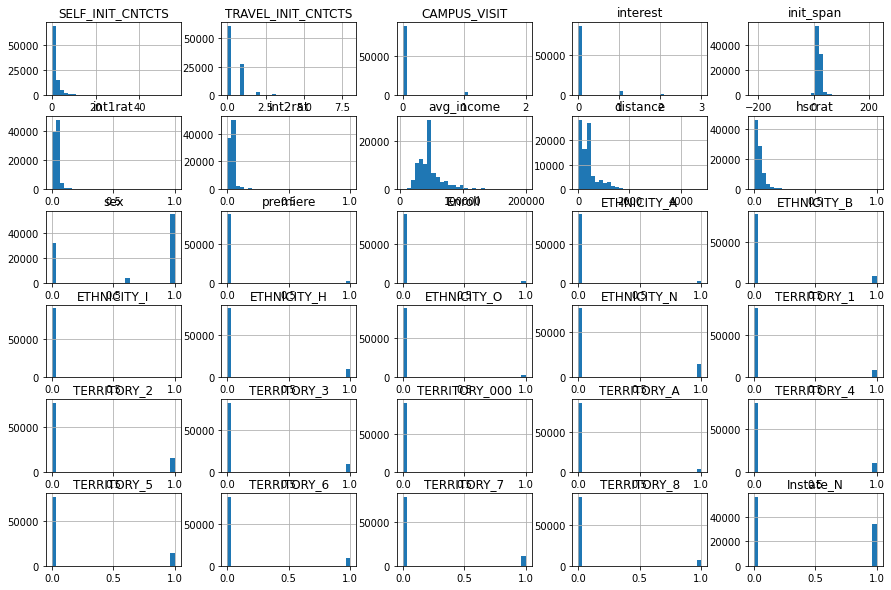

In [ ]:
#Histograms
XFS.hist(bins=30,figsize=(15,10))

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = XFS.columns
vif['VIF Factor'] = [variance_inflation_factor(XFS.values, i) for i in range(len(XFS.columns))]
vif


,feature,VIF Factor
0,SELF_INIT_CNTCTS,2.818107
1,TRAVEL_INIT_CNTCTS,1.598515
2,CAMPUS_VISIT,1.221635
3,interest,1.160367
4,init_span,6.109875
5,int1rat,5.507582
6,int2rat,6.773718
7,avg_income,8.624715
8,distance,4.264029
9,hscrat,1.733120


In [ ]:
# correlation
XFS.corr()

,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,CAMPUS_VISIT,interest,init_span,int1rat,int2rat,avg_income,distance,hscrat,...,TERRITORY_2,TERRITORY_3,TERRITORY_000,TERRITORY_A,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,Instate_N
SELF_INIT_CNTCTS,1.000000,0.059156,0.339545,0.283894,-0.041523,0.198880,0.187631,0.166145,-0.117030,0.231151,...,-0.078735,0.064433,-0.001837,-0.046405,0.020730,-0.049248,0.022445,-0.001169,0.067189,-0.145825
TRAVEL_INIT_CNTCTS,0.059156,1.000000,0.002808,0.105864,0.116978,0.160831,0.179017,-0.046238,-0.134575,-0.026865,...,-0.080108,0.046543,-0.004842,-0.016777,0.010108,0.003461,0.004352,-0.005759,0.022772,-0.223375
CAMPUS_VISIT,0.339545,0.002808,1.000000,0.116651,0.043017,0.074249,0.070314,0.111510,-0.052923,0.128343,...,-0.040124,0.018938,-0.001368,-0.021916,0.002930,-0.026002,0.021251,-0.020374,0.072995,-0.048453
interest,0.283894,0.105864,0.116651,1.000000,-0.005882,0.082309,0.081626,0.025573,-0.045678,0.069986,...,-0.018394,0.025340,-0.001638,-0.023098,0.015632,-0.002095,0.007305,-0.001445,-0.009288,-0.061184
init_span,-0.041523,0.116978,0.043017,-0.005882,1.000000,-0.083764,-0.095125,-0.024930,0.001369,-0.054436,...,0.069560,-0.029639,-0.013974,0.017810,-0.001459,-0.001683,-0.012600,0.010284,0.000464,0.069400
int1rat,0.198880,0.160831,0.074249,0.082309,-0.083764,1.000000,0.498628,0.049815,-0.396623,0.133807,...,-0.185902,0.176564,0.000582,-0.154239,0.055241,-0.052872,0.110252,-0.010437,-0.030889,-0.648102
int2rat,0.187631,0.179017,0.070314,0.081626,-0.095125,0.498628,1.000000,0.044020,-0.429331,0.138267,...,-0.195434,0.186081,-0.002445,-0.170473,0.060291,-0.058886,0.113918,-0.004120,-0.039095,-0.697603
avg_income,0.166145,-0.046238,0.111510,0.025573,-0.024930,0.049815,0.044020,1.000000,0.024785,0.223728,...,-0.150240,0.078488,0.001013,0.067385,0.035701,-0.172067,0.042955,-0.008606,0.070774,-0.018126
distance,-0.117030,-0.134575,-0.052923,-0.045678,0.001369,-0.396623,-0.429331,0.024785,1.000000,-0.086314,...,0.091328,-0.183647,-0.000376,0.376455,-0.068913,0.089260,-0.148758,0.107272,0.057119,0.629315
hscrat,0.231151,-0.026865,0.128343,0.069986,-0.054436,0.133807,0.138267,0.223728,-0.086314,1.000000,...,-0.090901,0.065689,-0.002440,-0.051345,0.015668,-0.075694,0.046157,-0.029362,0.090005,-0.147480


In [ ]:
# Data partition
y = dfFS['stucell']
from sklearn.model_selection import train_test_split
XFS_train,XFS_val,y_train,y_val=train_test_split(XFS,y,test_size=0.3,random_state=0)

In [ ]:
XFS_train.shape
XFS_val.shape

(27445, 30)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
est = sm.OLS(y.astype(float), XFS.astype(float)).fit()

In [ ]:
# Fit a logistic regression
import statsmodels.api as sm
log_reg = sm.Logit(y_train,XFS_train).fit()
print(log_reg.summary())

         Current function value: 0.594829
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                stucell   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64007
Method:                           MLE   Df Model:                           29
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                  0.1416
Time:                        05:08:07   Log-Likelihood:                -38091.
converged:                      False   LL-Null:                       -44375.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SELF_INIT_CNTCTS       0.5628      0.009     60.052      0.000       0.544       0.581
TRAVEL_INIT_CNTCTS     0.1556      0.017 

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


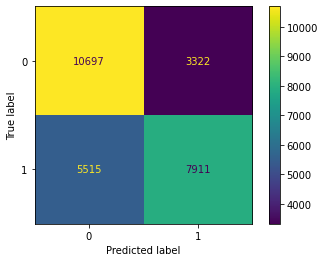

Accuracy Score


0.6780105665877209

In [ ]:
# Model Evaluation (accuracy + confusion matrix)
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
prediction_prob = log_reg.predict(XFS_val)
prediction =list(map(round,prediction_prob))
cm = confusion_matrix(y_val,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print('Accuracy Score')
accuracy_score(y_val,prediction)

Logistic: ROC AUC =0.738


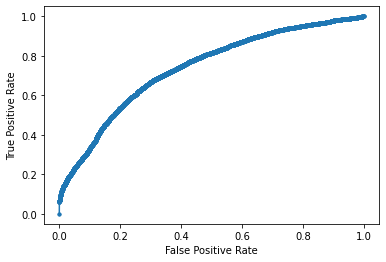

In [ ]:
# model evaluation -- roc curve
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt # Matplotlib is a plotting library for Python...
lr_auc = roc_auc_score(y_val,prediction_prob)
print('Logistic: ROC AUC =%.3f' % (lr_auc))
lr_fpr, lr_tpr, threshold = roc_curve(y_val,prediction_prob)
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#kds installation
! pip install kds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


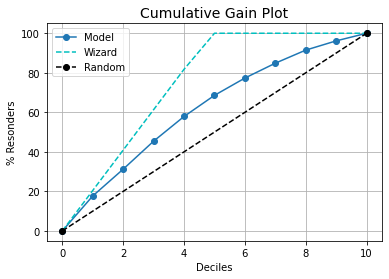

In [ ]:
# model evaluation -- The Cumulative Gain Chart --> Wizard Curve
import kds
kds.metrics.plot_cumulative_gain(y_val, prediction_prob)

In [ ]:
# tree 1 using the stopping rule
from sklearn import tree
from sklearn.tree import export_text
dtree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=30, random_state = 0)
dtree = dtree.fit(XFS_train,y_train)

In [ ]:
# decision tree in a text format

r = export_text(dtree, feature_names=list(XFS_train.columns.values))
print(r)

|--- SELF_INIT_CNTCTS <= 1.50
|   |--- ETHNICITY_N <= 0.50
|   |   |--- SELF_INIT_CNTCTS <= 0.50
|   |   |   |--- init_span <= 25.50
|   |   |   |   |--- class: 0
|   |   |   |--- init_span >  25.50
|   |   |   |   |--- class: 0
|   |   |--- SELF_INIT_CNTCTS >  0.50
|   |   |   |--- TRAVEL_INIT_CNTCTS <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- TRAVEL_INIT_CNTCTS >  0.50
|   |   |   |   |--- class: 1
|   |--- ETHNICITY_N >  0.50
|   |   |--- init_span <= 20.50
|   |   |   |--- init_span <= 14.50
|   |   |   |   |--- class: 1
|   |   |   |--- init_span >  14.50
|   |   |   |   |--- class: 0
|   |   |--- init_span >  20.50
|   |   |   |--- init_span <= 30.50
|   |   |   |   |--- class: 1
|   |   |   |--- init_span >  30.50
|   |   |   |   |--- class: 0
|--- SELF_INIT_CNTCTS >  1.50
|   |--- SELF_INIT_CNTCTS <= 3.50
|   |   |--- init_span <= 14.50
|   |   |   |--- TRAVEL_INIT_CNTCTS <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- TRAVEL_INIT_CNTCTS >  0.50
|   |   |   | 

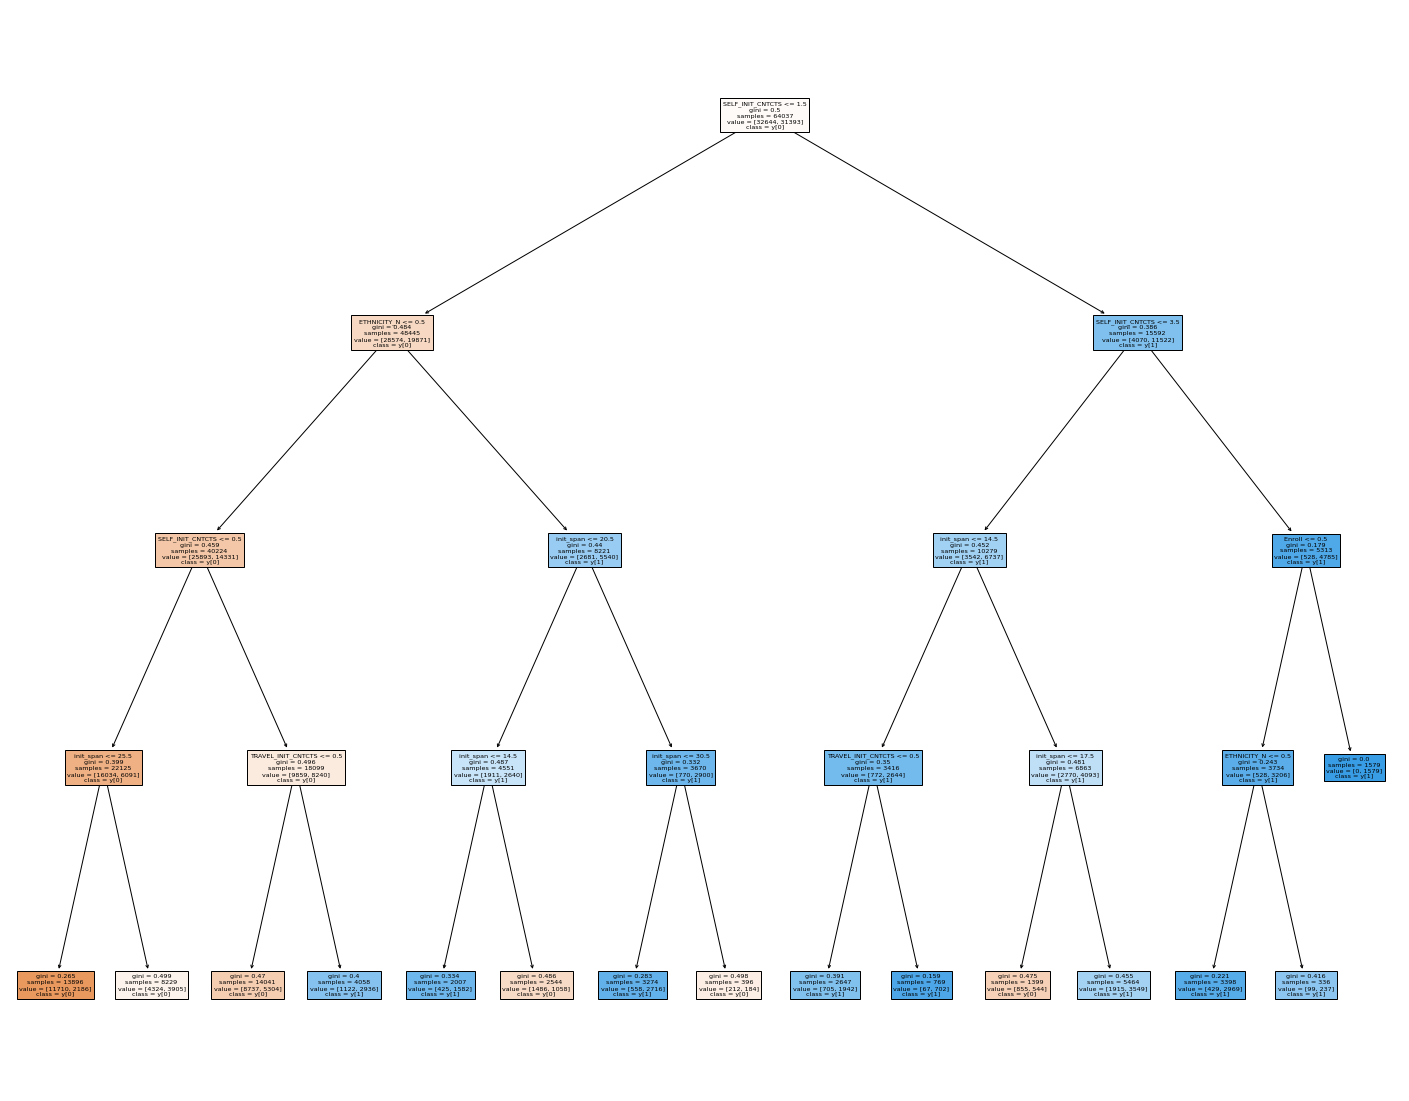

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = [25,20])

tree.plot_tree(dtree,
               feature_names = list(XFS_train.columns.values),
               class_names = True,
               filled = True)
plt.show()

In [ ]:
# Evaluate model performance

from sklearn.metrics import confusion_matrix

prediction = dtree.predict(XFS_val)

confusion_matrix(y_val, prediction)

array([[11710,  2309],
       [ 5682,  7744]])

In [ ]:
dtree.score(XFS_val,y_val) # accuracy

0.7088358535252323

In [ ]:
# other measures
tn, fp, fn, tp = confusion_matrix(y_val, prediction).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.8352949568442828


In [ ]:
# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predic_prob =dtree.predict_proba(XFS_val) # Probability estimates
print(predic_prob)
tree_auc =roc_auc_score(y_val, predic_prob[:,1])
print(tree_auc)

[[0.62224913 0.37775087]
 [0.84268854 0.15731146]
 [0.84268854 0.15731146]
 ...
 [0.17043372 0.82956628]
 [0.62224913 0.37775087]
 [0.17043372 0.82956628]]
0.7763980629935452


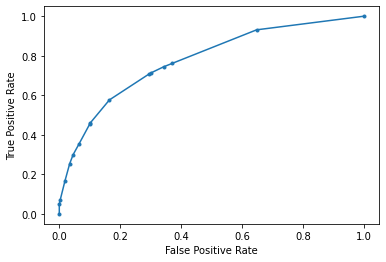

In [ ]:
# visualization of roc curve
tree_fpr, tree_tpr, threshold =roc_curve(y_val, predic_prob[:,1])
plt.plot(tree_fpr,tree_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# tree 2 pruning
from sklearn import tree
from sklearn.tree import export_text
dtree2 = tree.DecisionTreeClassifier()
dtree2 = dtree2.fit(XFS_train,y_train)

In [ ]:
r2 = export_text(dtree2, feature_names=list(XFS_train.columns.values))
print(r2)

|--- SELF_INIT_CNTCTS <= 1.50
|   |--- ETHNICITY_N <= 0.50
|   |   |--- SELF_INIT_CNTCTS <= 0.50
|   |   |   |--- init_span <= 25.50
|   |   |   |   |--- init_span <= 10.50
|   |   |   |   |   |--- init_span <= 7.50
|   |   |   |   |   |   |--- init_span <= 6.50
|   |   |   |   |   |   |   |--- ETHNICITY_B <= 0.50
|   |   |   |   |   |   |   |   |--- int1rat <= 0.01
|   |   |   |   |   |   |   |   |   |--- int1rat <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- Instate_N <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Instate_N >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- int1rat >  0.00
|   |   |   |   |   |   |   |   |   |   |--- TERRITORY_A <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- TERRITORY_A >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   | 

In [ ]:
# check tree size
n_nodes = dtree2.tree_.node_count
print(n_nodes)

24569


In [ ]:
# pruning the tree
path = dtree2.cost_complexity_pruning_path(XFS_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # ccp.alpha: control the size of the tree

In [ ]:
# combine a series of decision tree models together
dtree2s = []
for ccp_alpha in ccp_alphas:
  dtree2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
dtree2.fit(XFS_train, y_train)
dtree2s.append(dtree2)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(dtree2s[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03982555832713447


In [ ]:
# model evaluation based on the validation data set
train_scores = [dtree2.score(XFS_train, y_train) for dtree2 in dtree2s]
validation_scores = [dtree2.score(XFS_val, y_val) for dtree2 in dtree2s]

print(validation_scores)
print(ccp_alphas)

accuracy_list = pd.DataFrame({'validation_scores': validation_scores}, {'ccp_alphas':ccp_alphas})
accuracy_list

[0.5108034250318819]
[0.         0.         0.         ... 0.01315764 0.02150464 0.03982556]


,validation_scores
ccp_alphas,0.510803


ValueError: ignored

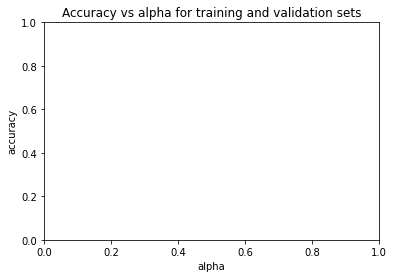

In [ ]:
# create a visualization for the accuracy list (optional spoke w/ Professor)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, validation_scores, marker="o", label="validation", 
        drawstyle="steps-post")
ax.legend()
plt.show()

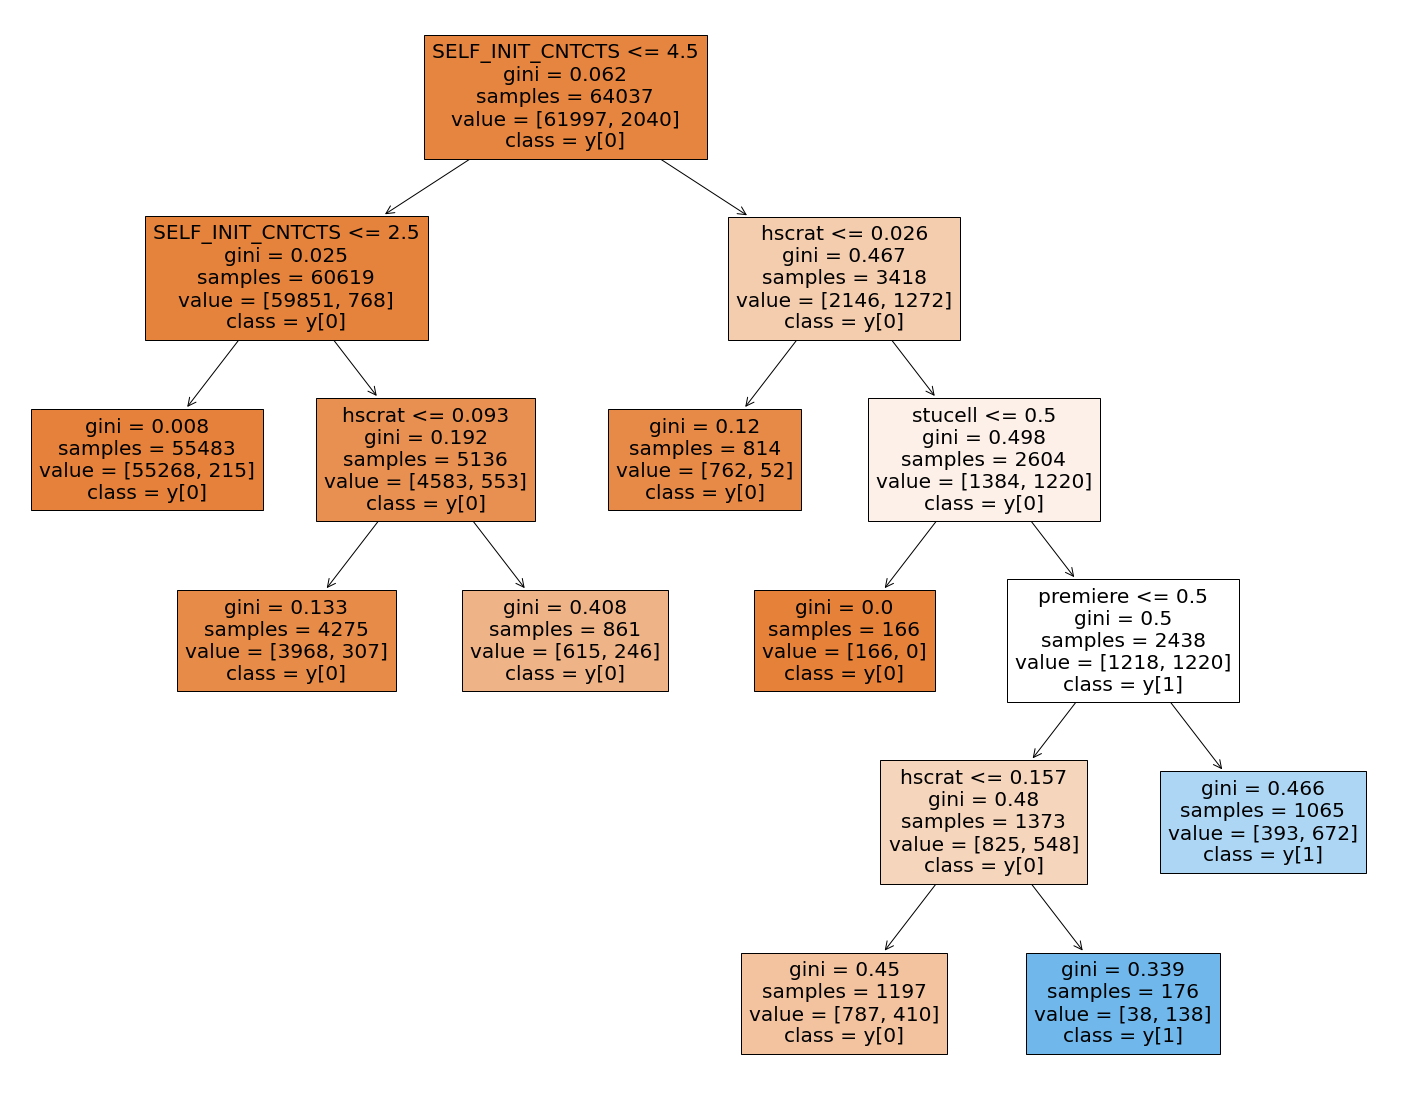

In [ ]:
dtree2 = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0008366214322590161)
dtree2 = dtree2.fit(XFS_train,y_train)
from matplotlib import pyplot as plt
plt.figure(figsize=[25,20])
tree.plot_tree(dtree2,
feature_names=list(XFS_train.columns.values),
class_names=True,
filled=True)
plt.show() # color represent? # left: yes ; right: No